

# Project: Investigate No_Show_Appointments Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This dataset is based on data from 100k Brazilian medical visits and focuses on whether or not patients show up for their appointments. Each row contains a number of characteristics about the subject.


### Question(s) for Analysis
>1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

> 2- What is the correlation between each feature?

In [1]:
# import statements for all of the packages that you

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> loading dataset and handling it




In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
#show head of dataset
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
#show number of columns and rows
df.shape

(110527, 14)

The data has 110527 rows and 14 columns

In [5]:
#some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


average age is : 37 years

minimum age : -1 and this isn't rational so that i will drop it in the next step


maximum age : 115 years , it's so old but it is possible


### Data Cleaning
>Clean data and remove data that leads to missing value

In [7]:
# change columns from upper to lower case
df.columns= df.columns.str.lower()

In [8]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#drop patient that has -1 year!
df = df[df.age>=0]

In [10]:
df.shape

(110526, 14)

In [11]:
#show missing value
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

Their is no missing value

In [12]:
#show duplicated row
df.duplicated().sum()

0

Their is no duplicated rows

In [13]:
#rename col name to correct name
df.rename(columns = {'patientid': 'patient_id'}, inplace = True)
df.rename(columns = {'appointmentid': 'appointment_id'}, inplace = True)
df.rename(columns = {'scheduledday': 'scheduled_day'}, inplace = True)
df.rename(columns = {'appointmentday': 'appointment_day'}, inplace = True)
df.rename(columns = {'hipertension': 'hypertension'}, inplace = True)
df.rename(columns = {'handcap': 'handicap'}, inplace = True)
df.rename(columns = {'no-show': 'no_show'}, inplace = True)



In [14]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#now i drop columns that isn't important
df.drop(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'], axis = 1 , inplace = True)

In [16]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> After I cleaned up my data, I'm ready to move on to exploring


### Research Question 
1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [17]:
Show = df.no_show == 'No'
NoShow = df.no_show == 'Yes'

Text(0,0.5,'patients number no show')

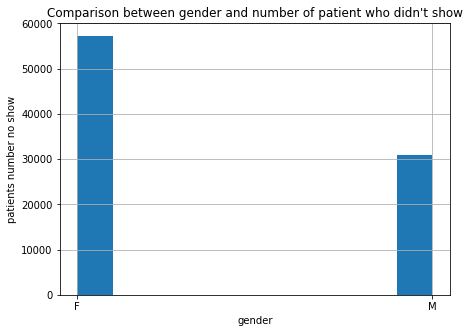

In [18]:
df.gender[Show].hist(figsize=(7,5));
plt.title("Comparison between gender and number of patient who didn't show" )
plt.xlabel('gender')
plt.ylabel('patients number no show')

in this figure we show that The number of female who  is twice the number of male which didn't come to the clinic

Text(0,0.5,'patients number show')

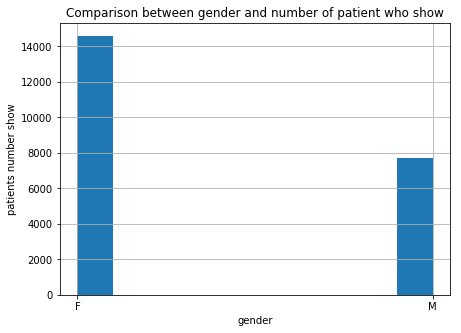

In [19]:
df.gender[NoShow].hist(figsize=(7,5));
plt.title("Comparison between gender and number of patient who show" )
plt.xlabel('gender')
plt.ylabel('patients number show')

in this figuer we show that The number of female who  is twice the number of male which come to the clinic

In [20]:
gender_no = df[NoShow].gender.count()
gender_sh = df[Show].gender.count()
print(int((gender_no/gender_sh)*100),'%')

25 %


The percentage of patients attending the clinic is 25%, which is a small percentage.

gender is unimportant feature

Text(0,0.5,'patients number no show')

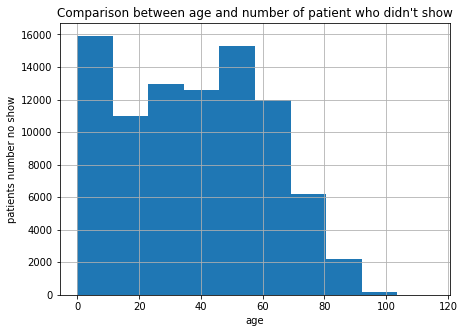

In [21]:
df.age[Show].hist(figsize=(7,5));
plt.title("Comparison between age and number of patient who didn't show" )
plt.xlabel('age')
plt.ylabel('patients number no show')

through this figure We conclude that:

patients from 0 to 10 is the most precentage which didn't come 

patients from 90 to 115 is the least precentage which didn't come 

Text(0,0.5,'patients number show')

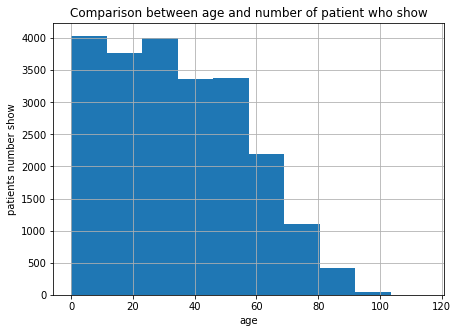

In [22]:
df.age[NoShow].hist(figsize=(7,5));
plt.title("Comparison between age and number of patient who show" )
plt.xlabel('age')
plt.ylabel('patients number show')

through this figure We conclude that:

patients from 0 to 10 and from 20 to 30 is the most precentage which come

patients from 90 to 115 is the least precentage which come

In [23]:
age_no = df[NoShow].age.sum()
age_sh = df[Show].age.sum()
print(int((age_no/age_sh)*100),'%')

22 %


patients between 0-10 showed more than other, and group from 35-70 are showed less than 0-10 , and While the show rate decreases from 70 to 115

The percentage of patients attending the clinic is 22%, which is a small percentage.

age is an unimportant feature

Text(0,0.5,'patients number noshow')

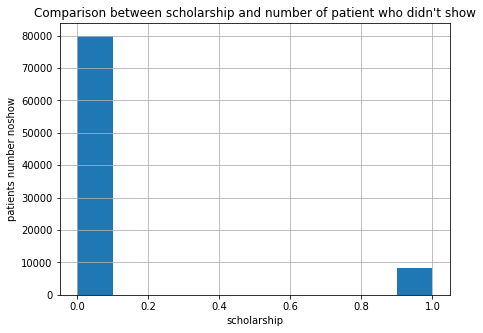

In [24]:
df.scholarship[Show].hist(figsize=(7,5));
plt.title("Comparison between scholarship and number of patient who didn't show" )
plt.xlabel('scholarship')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients non scholarship holder and slightly percentage who enrolled



Text(0,0.5,'patients number show')

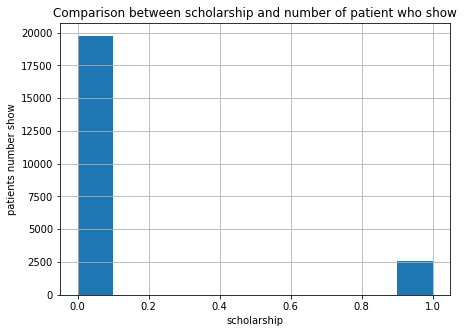

In [25]:
df.scholarship[NoShow].hist(figsize=(7,5));
plt.title("Comparison between scholarship and number of patient who show" )
plt.xlabel('scholarship')
plt.ylabel('patients number show')

through this figure We conclude that:

most patients who come to the clinic non scholarship holder and slightly percentage who enrolled

In [26]:
scholarship_no = df[NoShow].scholarship.sum()
scholarship_sh = df[Show].scholarship.sum()
print(int((scholarship_no/scholarship_sh)*100),'%')


31 %


The percentage of patients attending the clinic is 31%, which is a small percentage.

about 10% are enrolled in the Brasillan welfare program

scholarship is an unimportant feature

Text(0,0.5,'patients number noshow')

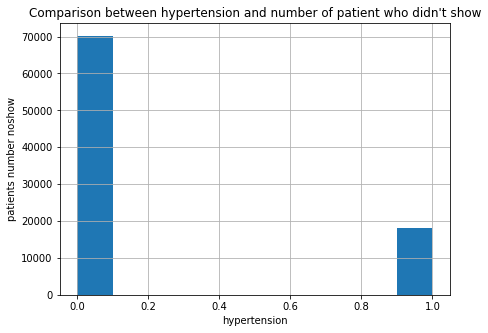

In [27]:
df.hypertension[Show].hist(figsize=(7,5));
plt.title("Comparison between hypertension and number of patient who didn't show" )
plt.xlabel('hypertension')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients which didn't come to the clinic  do not suffer from hypertension and slightly percentage who suffer from it

Text(0,0.5,'patients number show')

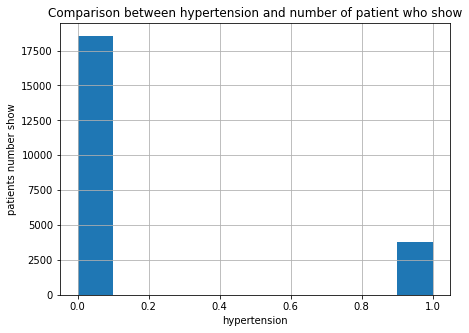

In [28]:
df.hypertension[NoShow].hist(figsize=(7,5));
plt.title("Comparison between hypertension and number of patient who show" )
plt.xlabel('hypertension')
plt.ylabel('patients number show')

through this figure We conclude that:

most patients  which come to the clinic do not suffer from hypertension and slightly percentage who suffer from it

In [29]:
hypertension_no = df[NoShow].hypertension.sum()
hypertension_sh = df[Show].hypertension.sum()
print(int((hypertension_no/hypertension_sh)*100),'%')


20 %


Text(0,0.5,'patients number noshow')

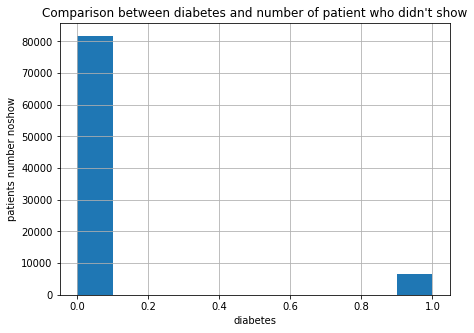

In [30]:
df.diabetes[Show].hist(figsize=(7,5));
plt.title("Comparison between diabetes and number of patient who didn't show" )
plt.xlabel('diabetes')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients do not suffer from diabetes and slightly percentage who suffer from it

Text(0,0.5,'patients number show')

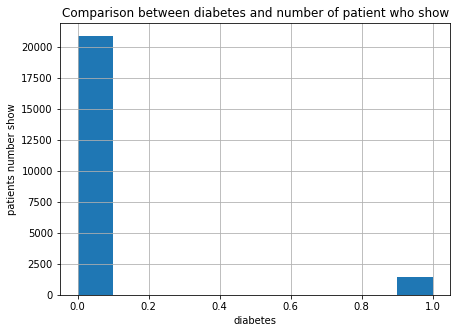

In [31]:
df.diabetes[NoShow].hist(figsize=(7,5));
plt.title("Comparison between diabetes and number of patient who show" )
plt.xlabel('diabetes')
plt.ylabel('patients number show')

through this figure We conclude that:

most patients whose come do not suffer from diabetes and slightly percentage who suffer from it

Text(0,0.5,'patients number noshow')

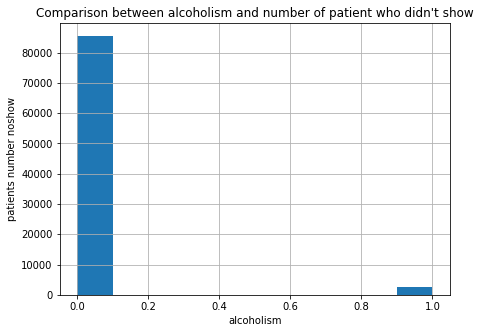

In [32]:
df.alcoholism[Show].hist(figsize=(7,5));
plt.title("Comparison between alcoholism and number of patient who didn't show" )
plt.xlabel('alcoholism')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients do not drink alcohol and slightly percentage drink it

Text(0,0.5,'patients number show')

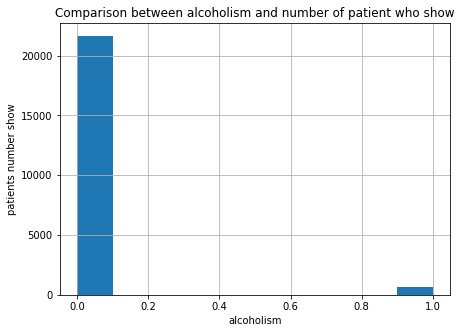

In [33]:
df.alcoholism[NoShow].hist(figsize=(7,5));
plt.title("Comparison between alcoholism and number of patient who show" )
plt.xlabel('alcoholism')
plt.ylabel('patients number show')

through this figure We conclude that:

most patients who show the clinic do not drink alcohol and slightly percentage  drink it

Text(0,0.5,'patients number noshow')

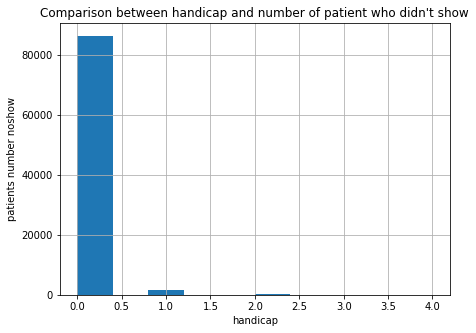

In [34]:
df.handicap[Show].hist(figsize=(7,5));
plt.title("Comparison between handicap and number of patient who didn't show" )
plt.xlabel('handicap')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients who didn't show the clinic are undisabled and slightly percentage are handicap 

Text(0,0.5,'patients number show')

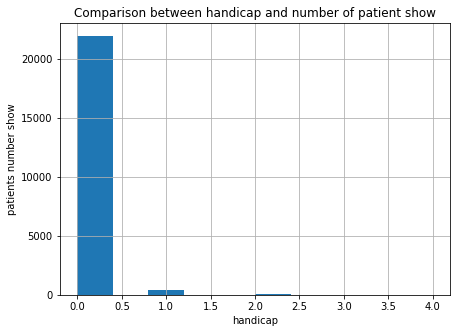

In [35]:
df.handicap[NoShow].hist(figsize=(7,5));
plt.title("Comparison between handicap and number of patient show" )
plt.xlabel('handicap')
plt.ylabel('patients number show')

through this figure We conclude that:

most patients who show the clinic are undisabled and slightly percentage are handicap

Text(0,0.5,'patients number noshow')

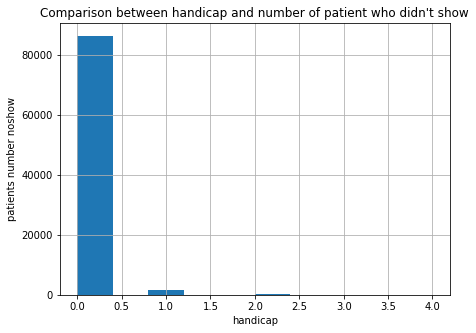

In [36]:
df.handicap[Show].hist(figsize=(7,5));
plt.title("Comparison between handicap and number of patient who didn't show" )
plt.xlabel('handicap')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients who didn't show the clinic are undisabled and slightly percentage are handicap

Text(0,0.5,'patients number noshow')

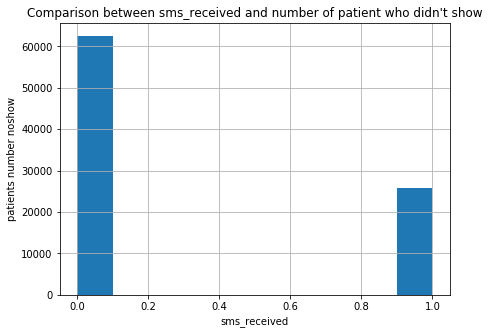

In [37]:
df.sms_received[Show].hist(figsize=(7,5));
plt.title("Comparison between sms_received and number of patient who didn't show" )
plt.xlabel('sms_received')
plt.ylabel('patients number noshow')

through this figure We conclude that:

most patients who didn't show They did not receive messages and slightly percentage  received messages

Text(0,0.5,'patients number show')

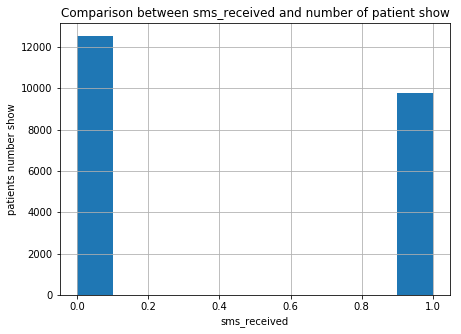

In [38]:
df.sms_received[NoShow].hist(figsize=(7,5));
plt.title("Comparison between sms_received and number of patient show" )
plt.xlabel('sms_received')
plt.ylabel('patients number show')

In [39]:
df_copy = df.copy()

In [40]:
df_copy['no_show'].replace(['Yes','No'],[0,1], inplace=True)

In [41]:
df_copy.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


### Research Question 2  (Replace this header name!)

Text(0,0.5,'patients number')

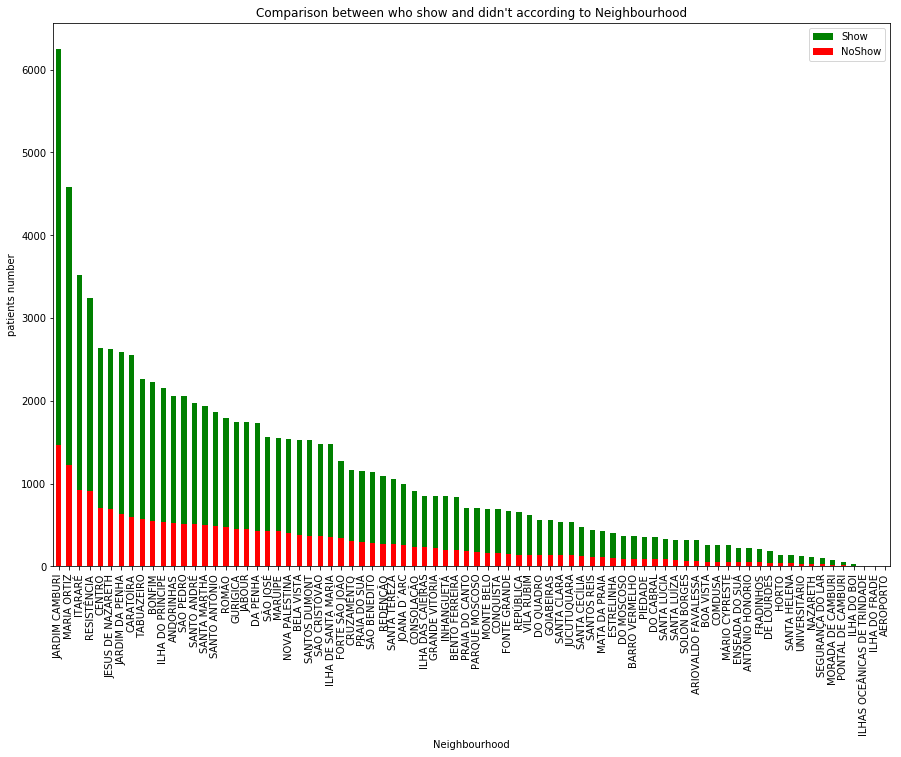

In [42]:
#Comparison between who show and didn't according to Neighbourhood
plt.figure(figsize=[15,10])
df_copy.neighbourhood[Show].value_counts().plot(kind='bar', alpha = 1, color = 'green', label = 'Show')
df_copy.neighbourhood[NoShow].value_counts().plot(kind='bar', alpha = 1, color = 'red', label = 'NoShow')
plt.legend()
plt.title("Comparison between who show and didn't according to Neighbourhood" )
plt.xlabel('Neighbourhood')
plt.ylabel('patients number')

The neighborhood is strongly affecting the showing patients at the clinic

<a id='conclusions'></a>
## Conclusions

>  Finally,

> I would like to say that their is no missing value ,but in my opinion 'patient_id', 'appointment_id', 'scheduled_day'and 'appointment_day' columns didn't affect the results and is 
expected to mislead the data so that i drop it.

> In the age column thier is a person has -1 year i expect this is a data entry error so that i drop it.

>I would like to say that the neighborhood is the strongest element affected to attend the clinic.

> The number of patients who Show are four times NoShow.

> Most people came to the clinic without receiving an SMS

> Most of those registered do not have chronic diseases

> about 10% are enrolled in the Brasillan welfare program
## Limitations: 
>There is no a direct correlation between attendance and not attendance and other characteristics such as handicap, diabetes, gender,  hypertension, and alcoholism. and neighborhood is the strongest element affected to attend the clinic.


## Submitting your Project 

>  Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

>  Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

>  Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0